## Introduction

The ability to plot data onto static graphs and images is a powerfully useful tool on its own, but if you use matplotlib long enough, you'll eventually reach a point when you want to interact with the data in your plots. In this lesson, and the next, we'll use the `ipywidgets` library that comes with IPython to create simple, yet effective interfaces that we can use to tweak the plots we're generating with matplotlib. 

So, let's go ahead and setup our notebook and take a look at an example where some interactivity would come in handy.

<!---So, let's say you're plotting some data that you've generated and you want to compare a few different results. The first thing you'd probably do is write a function that takes a few parameters allowing you to tweak the results, right? You still have a problem though, specifically, how do you quickly and easily plot several different runs of your function? Well, if you're doing everything in a Jupyter notebook, you could have a separate cell for each set of parameters, but that's a bit cumbersome and doesn't allow you to work interactively with your data. What you'd really like to do is hook up a handful of UI components, e.g., sliders, text boxes, and radio buttons, to your function and use that to tweak the plotted results. Lucky for you, IPython comes with a fantastic library called `ipywidgets` that provides some straightforward, and powerful tools for wrapping your functions in a simple UI --->

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Use Case: Investing

So, let's assume that you've just received a lump sum of money---for sake of argument, let's say you just got your annual bonus---and now you want to save your newfound fortune for retirement. To pick out the right investment vehicle for your recent windfall, you'll need to analyze the future value of your investment given a handful of variables. The formula for doing this is simple, and if you're interested, you can read over the Wikipedia article on [compound interest][1] for more details on the equation that we'll use in the next cell to create the future value function, or `fv` for short. 

[1]: https://en.wikipedia.org/wiki/Compound_interest

In [2]:
def fv(p, i, n, t):
    """Returns the future value of an investment
    
    Arguments:
    p -- Initial investment (i.e., present value)
    i -- Interest rate
    n -- Number of times investment is compounded per year
    t -- Total time (in years) of the investment
    """
    return p * (1 + float(i)/n)**(n * t)

And now, let's try out our function to see what it gives us for an investment of, say, \$10,000 in 10-year Treasury Bonds that have historically yielded an [average compound rate (from 2006-2015)][1] of 4.7%.

[1]: http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html

In [4]:
print ("${:,.2f}".format(fv(10000, 0.0471, 1, 10)))

$15,844.61


Well, that's not too bad, in just 10 years we've turned our \$10,000 investment into a little over \$15k. But, now let's assume I want to see how that investment looks over the full term of the investment. In other words, I'd like to see a plot of the value of my investment for each year that I have the money invested. 

The `plot_fv` function in the next cell takes the same set of parameters as our `fv` function and uses the `fv` function to calculate the return for every year. Then it plots the future value for each year onto a simple line graph.

In [5]:
def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]
    plt.plot(fvs)

Now, let's give our `plot_fv` function a try with the same set of values that we used in the previous example for 10-year T-Bonds, but this time let's push the time period of our investment out to 30 years.

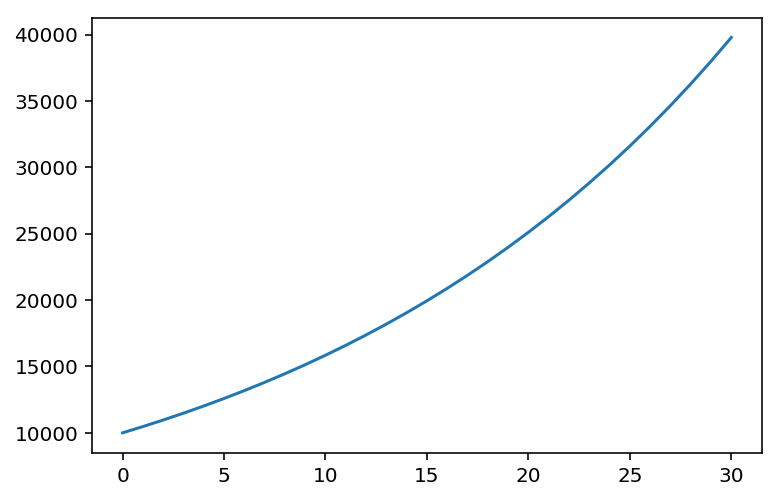

In [6]:
plot_fv(10000, 0.0471, 1, 30)

Hmm, well, going from \$10k to \$40k over the course of 30 years is better than nothing, but to be perfectly honest, I was really hoping to see a slightly better return on my investment. 

The nice thing about this example though, is that we have a handful of parameters that we can tweak to change the output of the equation, so we can play around with the variables a bit to find the best place to stash our cash. That said, plotting the outcome of each combination of parameters in a separate cell can get a bit cumbersome. I don't know about you, but I'd prefer just adjusting a few sliders, or filling in a text box or two to get a new plot. Luckily, the [`ipywidgets`][1] library that comes with IPython allows us to do just that. 

[1]: http://nbviewer.ipython.org/github/ipython/ipywidgets/blob/master/examples/notebooks/Index.ipynb

## Adding Some Interactivity

The next cell imports the `interact` function from the `ipywidgets` module. Personally, I find this function to be magical (in a good way) in what it can do, and many times, this will most likely be all that you need. So, let's import the `ipywidgets` module and give it a try.

In [7]:
import ipywidgets

The `interact` function creates simple graphical interfaces for functions based on a set of keword arguments that are passed to it when called. The result will be a user interface that you can interact with to modify the input to the underlying function. If, as with our `plot_fv` function, the output is a matplotlib plot, that plot will be updated with each parameter change. Sounds amazing right? Well, let's give it a try and see it in action.

The code in the next cell, calls the `interact` function and passes in our `plot_fv` function. Then we pass in a default values for each parameter in `plot_fv`. Doing so will allow the `interact` function to figure out a few things: first, the names of each of the parameters of the underlying function, second, the type of each parameter allowing it to choose the correct widget to represent each one, and finally, the default value for each parameter and corresponding widget. 

Now, let's run the code below to see it in action.

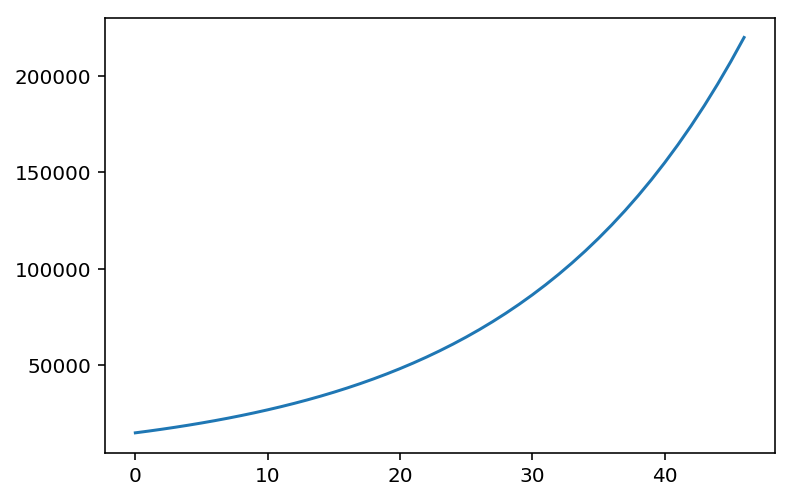

In [8]:
ipywidgets.interact(plot_fv, p=10000, i=0.04, n=1, t=30);

## Conclusion

Now, we can change things like the amount of our investment, or the interest rate that we'll earn, and immediately see the outcome of that change. This is fantastic, but what I really love most about the ipywidgets library, and more specifically the `interact` function, is that it's about the most "bang for your buck" you can get. As we've just seen, you simply call the `interact` function, pass in the function you want to interact with, and set some sensible defaults for the parameters of the underlying function, and you have an extremely useful interface---all with just one line of code. To make things even easier, we could've just used the `interact` function as a decorator on the `plot_fv` function instead of making a separate call to it later. 

Of course, the interface we created is not without problems. For example, it doesn't make much sense to invest a negative amount of money, and the interest rate selector doesn't give us much granularity at all. And, probably the most egregious behavior of the interface is the fact that you can choose 0 for the number of times the investment compounds per year---this just ends up throwing a division by zero error if you try it.

Fortunately, the `interact` function allows us to change the behavior of each individual UI element just by changing the information that we pass into it, and in the next lesson, we'll see just how to do that. We'll also see how to use some of the more advanced features of the ipywidgets library to refine our interface even more.